# Book Sales Analysis and Prediction

In our project, we've utilized a dataset sourced from Kaggle (https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings/download?datasetVersionNumber=2). Our primary objective is to forecast book sales by developing a predictive model. The dataset encompasses crucial information, including genre, author rating, book average rating, sale price, publishing year, book ratings count, sales rank, and units sold. Employing a machine learning methodology, particularly a Random Forest Regressor, we aim to predict the quantity of units sold based on these diverse features.

# Data Understanding



1. Publishing Year: The year when the book was published.
2. Book Name: The title given to identify the book commercially.
3. Author: Full name of the writer who authored the book.
4. language_code: Code indicating the language used to write the book content.
5. Author_Rating: A measure of expertise and popularity for the author based on past work.
6. Book_average_rating: The statistical mean of ratings assigned by individual readers.
7. Book_ratings_count: Total number of ratings received from readers for this book.
8. genre: Style, intended audience or fictional category reflecting the book’s content.
9. gross sales: Total monetary revenue obtained through sale of this book during analysis period.
10. publisher revenue: Portion of gross sales earned specifically by the publisher company.
11. sale price: Retail price at which each unit of the book is sold.
12. sales rank: Ranking for this book across other books based on units sold over recent period.
13. Publisher: Name of organization handling publishing, marketing and distribution.
14. units sold: Number of copies sold of this specific book during analysis timeframe

# Data Cleaning

The initial step involves cleaning the dataset through the following procedures:

1. Eliminate rows containing null values.
2. Ensure uniform formatting of the data, maintaining consistent data types for each column.

In [3]:
import csv

file_path= "C:/Users/sweth/Documents/Python Scripts/Python/archive/Books_Data_Clean.csv"

def load_and_inspect_csv(file_path):
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)  
        data = []
        for row in reader:
            data.append(row)
    return headers, data

csv_headers_books_clean, csv_data_books_clean = load_and_inspect_csv(file_path)


In [6]:
def clean_csv_data(data):
    cleaned_data = []
    for row in data:
        # Checking for null or empty values in the row
        if all(cell.strip() for cell in row):
            # Convert numeric values to appropriate types
            try:
                publishing_year = (row[1])
                book_average_rating = float(row[6])
                book_ratings_count = int(row[7])
                gross_sales = float(row[9])
                publisher_revenue = float(row[10])
                sale_price = float(row[11])
                sales_rank = int(row[12])
                units_sold = int(row[14])

                cleaned_row = [
                    row[0],  
                    publishing_year,
                    row[2],  
                    row[3],  
                    row[4],  
                    row[5],  
                    book_average_rating,
                    book_ratings_count,
                    row[8],  
                    gross_sales,
                    publisher_revenue,
                    sale_price,
                    sales_rank,
                    row[13], 
                    units_sold
                ]

                cleaned_data.append(cleaned_row)
            except ValueError:
                # Skip rows with invalid numeric values
                continue
        else:
            # Skip rows with null or empty values
            continue

    return cleaned_data

cleaned_csv_data_books = clean_csv_data(csv_data_books_clean)


# Normalized Database Creation 


The subsequent step involved transforming the dataset into a normalized database.

The normalized database comprises five tables, each serving a specific purpose:

1. Books Table: Contains detailed information about each book, including Book Name, Publishing Year, Book Average Rating, Book Ratings Count, and Genre.

2. Authors Table: Holds information about authors, encompassing Author Name and Author Rating.

3. Sales Data Table: Includes sales-related details such as Gross Sales, Publisher Revenue, Sale Price, Units Sold, and Sales Rank.

4. Publishers Table: Contains information specific to publishers.

5. Languages Table: Encompasses different language codes for the books in the dataset.

In [11]:
import pandas as pd
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn

def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows



conn_normalized_books = create_connection('book_sales_normalized_database.db')

create_books_sql = '''
CREATE TABLE IF NOT EXISTS [Books] (
    [book_id] INTEGER NOT NULL PRIMARY KEY,
    [name] TEXT,
    [publishing_year] INTEGER,
    [book_average_rating] REAL,
    [book_ratings_count] INTEGER,
    [genre] TEXT,
    [author_id] INTEGER,
    [publisher_id] INTEGER,
    [language_id] INTEGER,
    FOREIGN KEY (author_id) REFERENCES Authors(author_id),
    FOREIGN KEY (publisher_id) REFERENCES Publishers (publisher_id),
    FOREIGN KEY (language_id) REFERENCES Languages(language_id)
)
'''

create_authors_sql = '''
CREATE TABLE IF NOT EXISTS [Authors] (
    [author_id] INTEGER NOT NULL PRIMARY KEY ,
    [name]TEXT UNIQUE,
    [rating] TEXT
)
'''

create_publishers_sql = '''
CREATE TABLE IF NOT EXISTS [Publishers] (
    [publisher_id] INTEGER NOT NULL PRIMARY KEY ,
    [name] TEXT UNIQUE
)
'''

create_languages_sql = '''
CREATE TABLE IF NOT EXISTS [Languages] (
    [language_id] INTEGER  NOT NULL PRIMARY KEY ,
    [code] TEXT UNIQUE
)
'''

create_sales_sql = '''
CREATE TABLE IF NOT EXISTS [Sales] (
    [sales_id] INTEGER NOT NULL PRIMARY KEY ,
    [book_id] INTEGER,
    [gross_sales] REAL,
    [publisher_revenue] REAL,
    [sale_price] REAL,
    [sales_rank] INTEGER,
    [units_sold] INTEGER,
    FOREIGN KEY (book_id) REFERENCES Books (book_id)
)'''


# Create the tables
create_table(conn_normalized_books, create_books_sql,'Books')
create_table(conn_normalized_books, create_authors_sql,'Authors')
create_table(conn_normalized_books, create_publishers_sql,'Publishers')
create_table(conn_normalized_books, create_languages_sql,'Languages')
create_table(conn_normalized_books, create_sales_sql,'Sales')


conn_normalized_books.close()

# Insertion Of Data into the tables

In this step, we accomplished the following tasks:

1. Unique Entities Insertion: We identified and inserted unique authors, publishers, and languages into their respective tables. This step involved creating dictionaries for efficient referencing.


2. Books Table Preparation: We prepared the data for the books table, including necessary references to the IDs of authors, publishers, and languages. This ensures proper relationships between entities in the normalized database.


3. Sales Data Insertion: We processed and inserted sales data into the sales table, establishing references to the book IDs. This step maintains the integrity of the relational database model, allowing for comprehensive analysis of book sales in association with various attributes.

In [12]:
import csv
from sqlite3 import connect, Error


csv_filename = 'C:/Users/sweth/Documents/Python Scripts/Python/archive/Cleaned_Books_Data.csv'
normalized_database_filename = 'book_sales_normalized_database.db'

conn_normalized_books = create_connection(normalized_database_filename)

with open(csv_filename, 'r', encoding='utf-8') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  
    unique_publishers = set()
    unique_languages = set()

    for row in csv_reader:
        unique_publishers.add(row[13])
        unique_languages.add(row[4])

    cur_publishers = conn_normalized_books.cursor()
    cur_publishers.executemany("INSERT INTO Publishers (name) VALUES (?)", [(publisher,) for publisher in unique_publishers])
    conn_normalized_books.commit()

    cur_languages = conn_normalized_books.cursor()
    cur_languages.executemany("INSERT INTO Languages (code) VALUES (?)", [(language,) for language in unique_languages])
    conn_normalized_books.commit()


author_to_rating = {row[3]: row[5] for row in cleaned_csv_data_books} 
authors_data_with_ratings = [(author, rating) for author, rating in author_to_rating.items()]
cur_authors = conn_normalized_books.cursor()
cur_authors.executemany("INSERT INTO authors (name, rating) VALUES (?, ?)", authors_data_with_ratings)
conn_normalized_books.commit()
conn_normalized_books.close()


In [13]:
author_dict={}
publisher_dict={}
language_dict={}
def create_author_to_authorid_dictionary(normalized_database_filename):
    nn_conn = create_connection(normalized_database_filename)
    sql_statement = "SELECT author_id, Name FROM Authors"
    values = execute_sql_statement(sql_statement, nn_conn)
    author_dict = {author[1]: author[0] for author in values}
    nn_conn.close()
    return author_dict

def create_publisher_to_publisherid_dictionary(normalized_database_filename):
    nn_conn = create_connection(normalized_database_filename)
    sql_statement = "SELECT publisher_id, Name FROM Publishers"
    values = execute_sql_statement(sql_statement, nn_conn)
    publisher_dict = {publisher[1]: publisher[0] for publisher in values}
    nn_conn.close()
    return publisher_dict

def create_language_to_languageid_dictionary(normalized_database_filename):
    nn_conn = create_connection(normalized_database_filename)
    sql_statement = "SELECT language_id, Code FROM Languages"
    values = execute_sql_statement(sql_statement, nn_conn)
    language_dict = {language[1]: language[0] for language in values}
    nn_conn.close()
    return language_dict


In [14]:

author_dict=create_author_to_authorid_dictionary('book_sales_normalized_database.db') 
publisher_dict=create_publisher_to_publisherid_dictionary('book_sales_normalized_database.db')
language_dict=create_language_to_languageid_dictionary('book_sales_normalized_database.db')
conn_normalized_books = create_connection('book_sales_normalized_database.db')

books_data = []
sales_data = []

for row in cleaned_csv_data_books:
    author=row[3]
    author_id=author_dict.get(author)
    publisher=row[13]
    publisher_id=publisher_dict.get(publisher)   
    language=row[4]
    language_id=language_dict.get(language)

    book_row = (
        row[2],
        row[1],  
        row[6],  
        row[7], 
        row[8],  
        author_id,
        publisher_id,
        language_id
    )
    books_data.append(book_row)

    


sql_books = '''
INSERT INTO books (name, publishing_year, book_average_rating, book_ratings_count, genre, author_id, publisher_id, language_id) 
VALUES (?, ?, ?, ?, ?, ?, ?, ?)
'''
cur_books = conn_normalized_books.cursor()
cur_books.executemany(sql_books, books_data)
conn_normalized_books.commit()

book_dict={}

def create_book_to_bookid_dictionary(normalized_database_filename):
    nn_conn = create_connection(normalized_database_filename)
    sql_statement = "SELECT book_id, name FROM books"
    values = execute_sql_statement(sql_statement, nn_conn)
    book_dict = {book[1]: book[0] for book in values}
    nn_conn.close()
    return book_dict

x=create_book_to_bookid_dictionary('book_sales_normalized_database.db')
for row in cleaned_csv_data_books:
    book=row[2]
    book_id=x.get(book)
    sales_row = (
            book_id,
            row[9],  
            row[10], 
            row[11], 
            row[12], 
            row[14]  
        )
    sales_data.append(sales_row)

sql_sales = '''
INSERT INTO sales (book_id, gross_sales, publisher_revenue, sale_price, sales_rank, units_sold) 
VALUES (?, ?, ?, ?, ?, ?)
'''

cur_sales = conn_normalized_books.cursor()
cur_sales.executemany(sql_sales, sales_data)
conn_normalized_books.commit()

conn_normalized_books.close()


In the subsequent phase of our project, we focused on extracting meaningful insights from the dataset through thorough data analysis and visualization.

# Exploratory Data Analysis (EDA): 

We have conducted initial analysis using SQL queries to understand trends, distributions, and correlations within the data. This is used to identify potential predictor variables for the models.


# Data Visualization:
To make our findings more accessible, we utilized visualizations such as charts and graphs. This helped in presenting trends and relationships among different variables in a clear and straightforward manner, making it easier for stakeholders to grasp important aspects of the dataset.

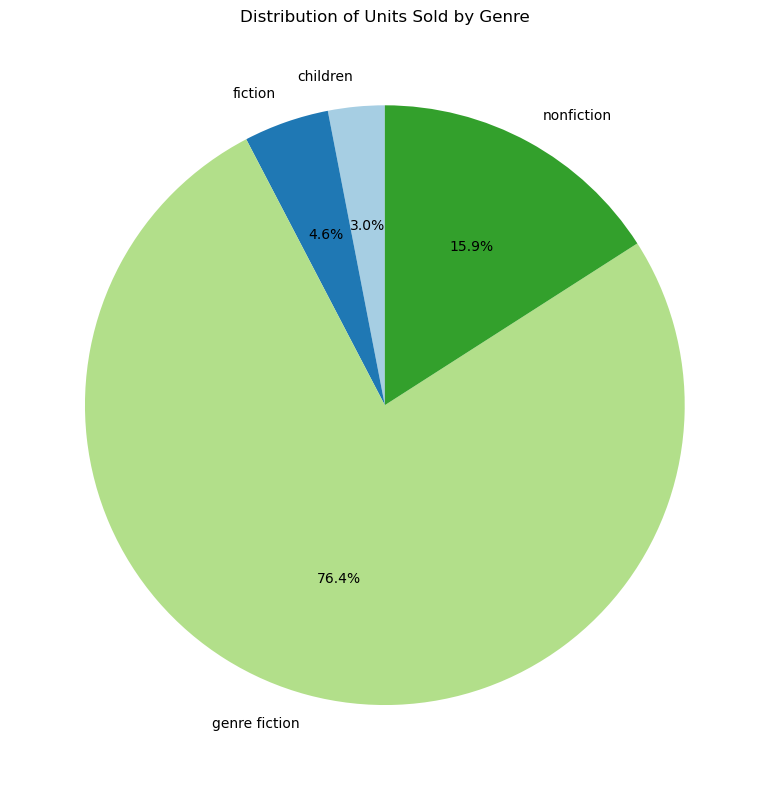

In [4]:
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd


conn = sqlite3.connect('book_sales_normalized_database.db')  
query = '''
SELECT b.genre, SUM(s.units_sold) AS total_units_sold
FROM Books b
JOIN Sales s ON b.book_id = s.book_id
GROUP BY b.genre;
'''
df = pd.read_sql_query(query, conn)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(df['total_units_sold'], labels=df['genre'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax.set_title('Distribution of Units Sold by Genre')
plt.tight_layout()
plt.show()
conn.close()

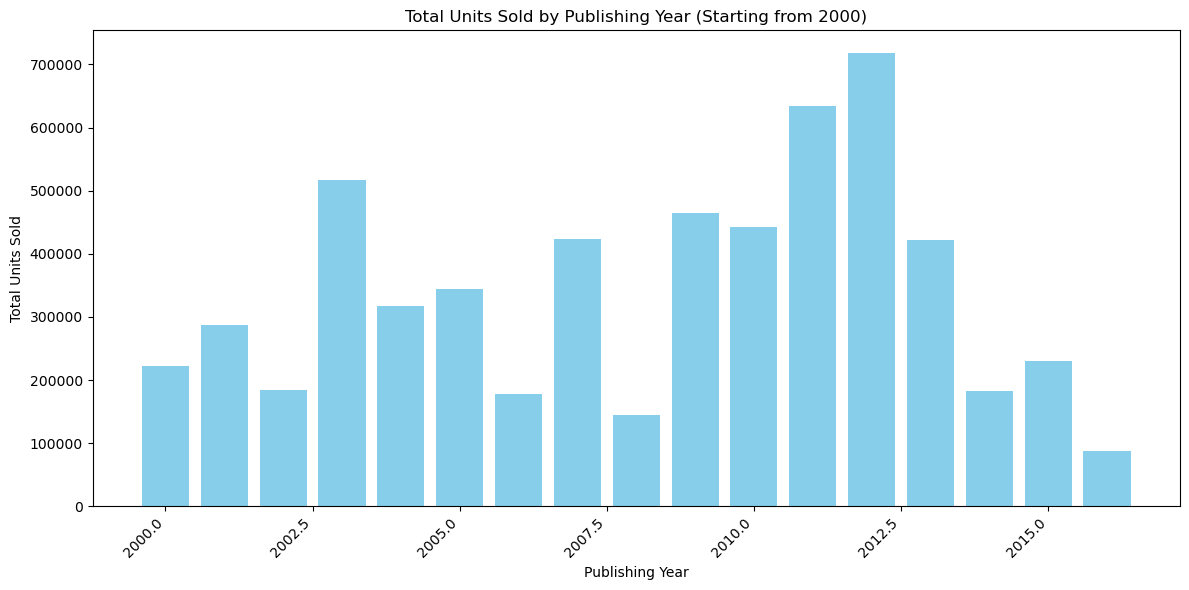

In [16]:

conn = sqlite3.connect('book_sales_normalized_database.db')  

query = '''
SELECT b.publishing_year, SUM(s.units_sold) AS total_units_sold
FROM Books b
JOIN Sales s ON b.book_id = s.book_id
GROUP BY b.publishing_year;
'''
df = pd.read_sql_query(query, conn)
df = df[df['publishing_year'] >= 2000]

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(df['publishing_year'], df['total_units_sold'], color='skyblue')
ax.set_title('Total Units Sold by Publishing Year (Starting from 2000)')
ax.set_xlabel('Publishing Year')
ax.set_ylabel('Total Units Sold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


conn.close()


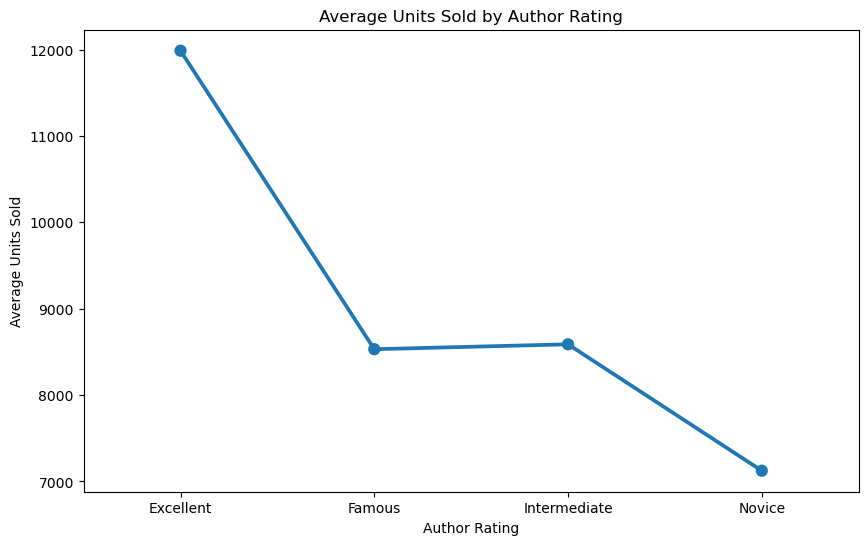

In [17]:
import seaborn as sns

conn = sqlite3.connect('book_sales_normalized_database.db')

query = """
SELECT 
    a.rating as author_rating, 
    AVG(s.units_sold) as average_units_sold
FROM 
    Sales s
JOIN 
    Books b ON s.book_id = b.book_id
JOIN 
    Authors a ON b.author_id = a.author_id
GROUP BY 
    a.rating;
"""

author_sales_df = pd.read_sql_query(query, conn)
conn.close()


plt.figure(figsize=(10, 6))
sns.pointplot(data=author_sales_df, x='author_rating', y='average_units_sold')

plt.title('Average Units Sold by Author Rating')
plt.xlabel('Author Rating')
plt.ylabel('Average Units Sold')

plt.show()


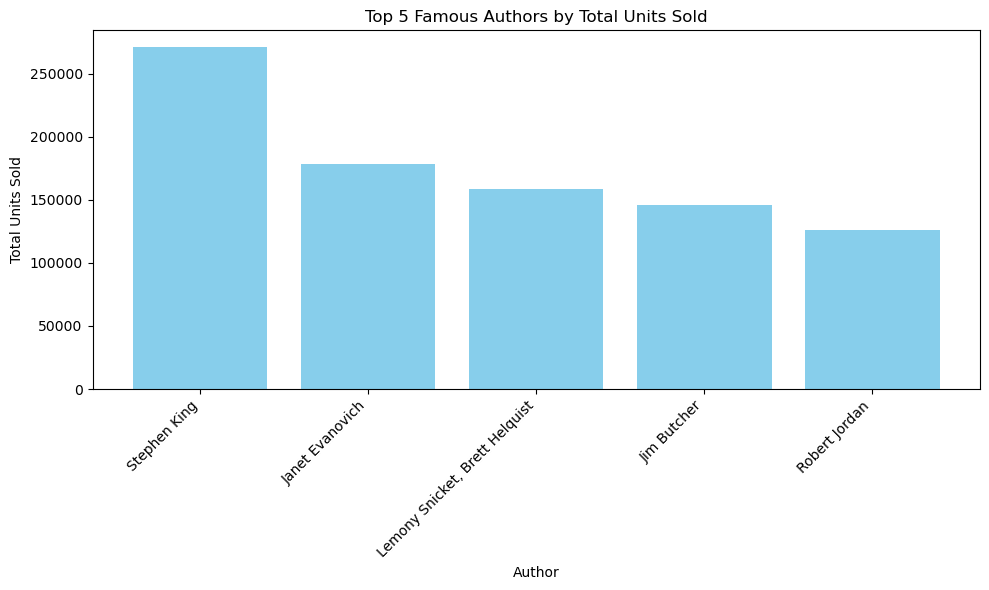

In [18]:

conn = sqlite3.connect('book_sales_normalized_database.db')  

query = '''
SELECT a.name, SUM(s.units_sold) AS total_units_sold
FROM Authors a
JOIN Books b ON a.author_id = b.author_id
JOIN Sales s ON b.book_id = s.book_id
GROUP BY a.name
ORDER BY total_units_sold DESC
LIMIT 5;
'''
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
plt.bar(df['name'], df['total_units_sold'], color='skyblue')
plt.title('Top 5 Famous Authors by Total Units Sold')
plt.xlabel('Author')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

conn.close()

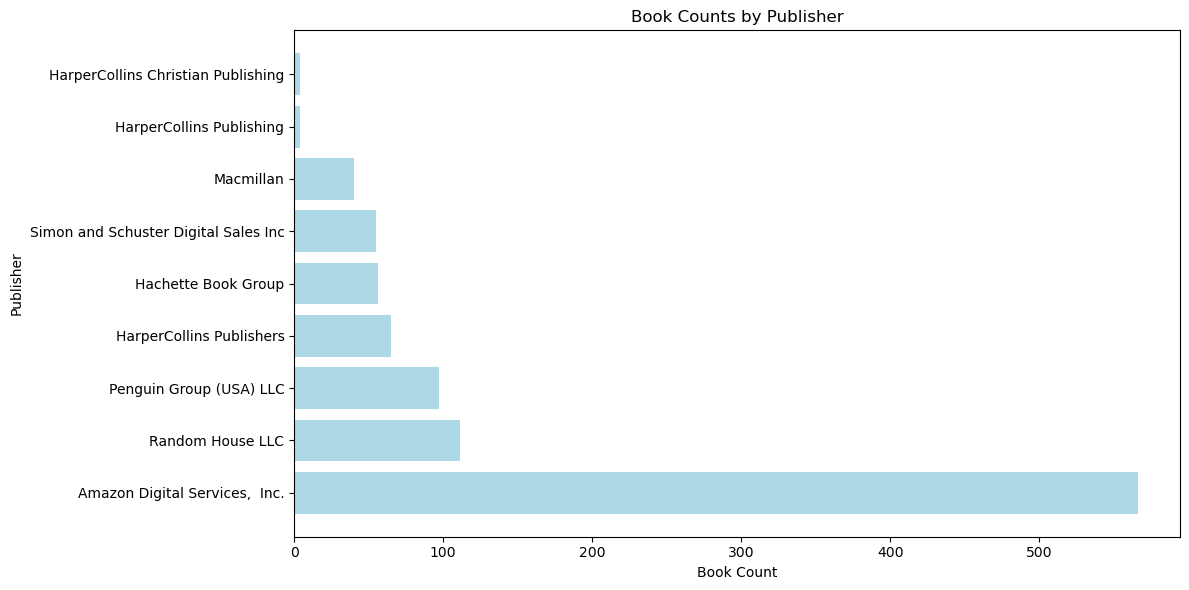

In [19]:
conn = sqlite3.connect('book_sales_normalized_database.db')  

query = '''
SELECT p.name, COUNT(b.book_id) AS book_count
FROM Publishers p
JOIN Books b ON p.publisher_id = b.publisher_id
GROUP BY p.name
ORDER BY book_count DESC;
'''
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 6))
plt.barh(df['name'], df['book_count'], color='lightblue')
plt.title('Book Counts by Publisher')
plt.xlabel('Book Count')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

conn.close()


In [5]:
query = """
SELECT 
    b.publishing_year,
    b.name AS book_name,
    b.book_average_rating,
    b.book_ratings_count,
    b.genre,
    a.name AS author_name,
    a.rating AS author_rating,
    l.code AS language_code,
    s.gross_sales,
    s.publisher_revenue,
    s.sale_price,
    s.units_sold,
    p.name AS publisher_name
FROM 
    Sales s
JOIN 
    Books b ON s.book_id = b.book_id
LEFT JOIN 
    Authors a ON b.author_id = a.author_id
LEFT JOIN 
    Publishers p ON b.publisher_id = p.publisher_id
LEFT JOIN 
    Languages l ON b.language_id = l.language_id;
"""

# Execute the query and load the data into a DataFrame
conn = sqlite3.connect('book_sales_normalized_database.db')
sales_analysis_df = pd.read_sql_query(query, conn)
conn.close()

# Display the first few rows of the DataFrame
sales_analysis_df.head()


,publishing_year,book_name,book_average_rating,book_ratings_count,genre,author_name,author_rating,language_code,gross_sales,publisher_revenue,sale_price,units_sold,publisher_name
0,1975,Beowulf,3.42,155903,genre fiction,"Unknown, Seamus Heaney",Novice,en-US,34160.0,20496.0,4.88,7000,HarperCollins Publishers
1,1987,Batman: Year One,4.23,145267,genre fiction,"Frank Miller, David Mazzucchelli, Richmond Lew...",Intermediate,eng,12437.5,7462.5,1.99,6250,HarperCollins Publishers
2,2015,Go Set a Watchman,3.31,138669,genre fiction,Harper Lee,Novice,eng,47795.0,28677.0,8.69,5500,"Amazon Digital Services, Inc."
3,2008,When You Are Engulfed in Flames,4.04,150898,fiction,David Sedaris,Intermediate,en-US,41250.0,24750.0,7.50,5500,Hachette Book Group
4,2011,Daughter of Smoke & Bone,4.04,198283,genre fiction,Laini Taylor,Excellent,eng,37952.5,22771.5,7.99,4750,Penguin Group (USA) LLC


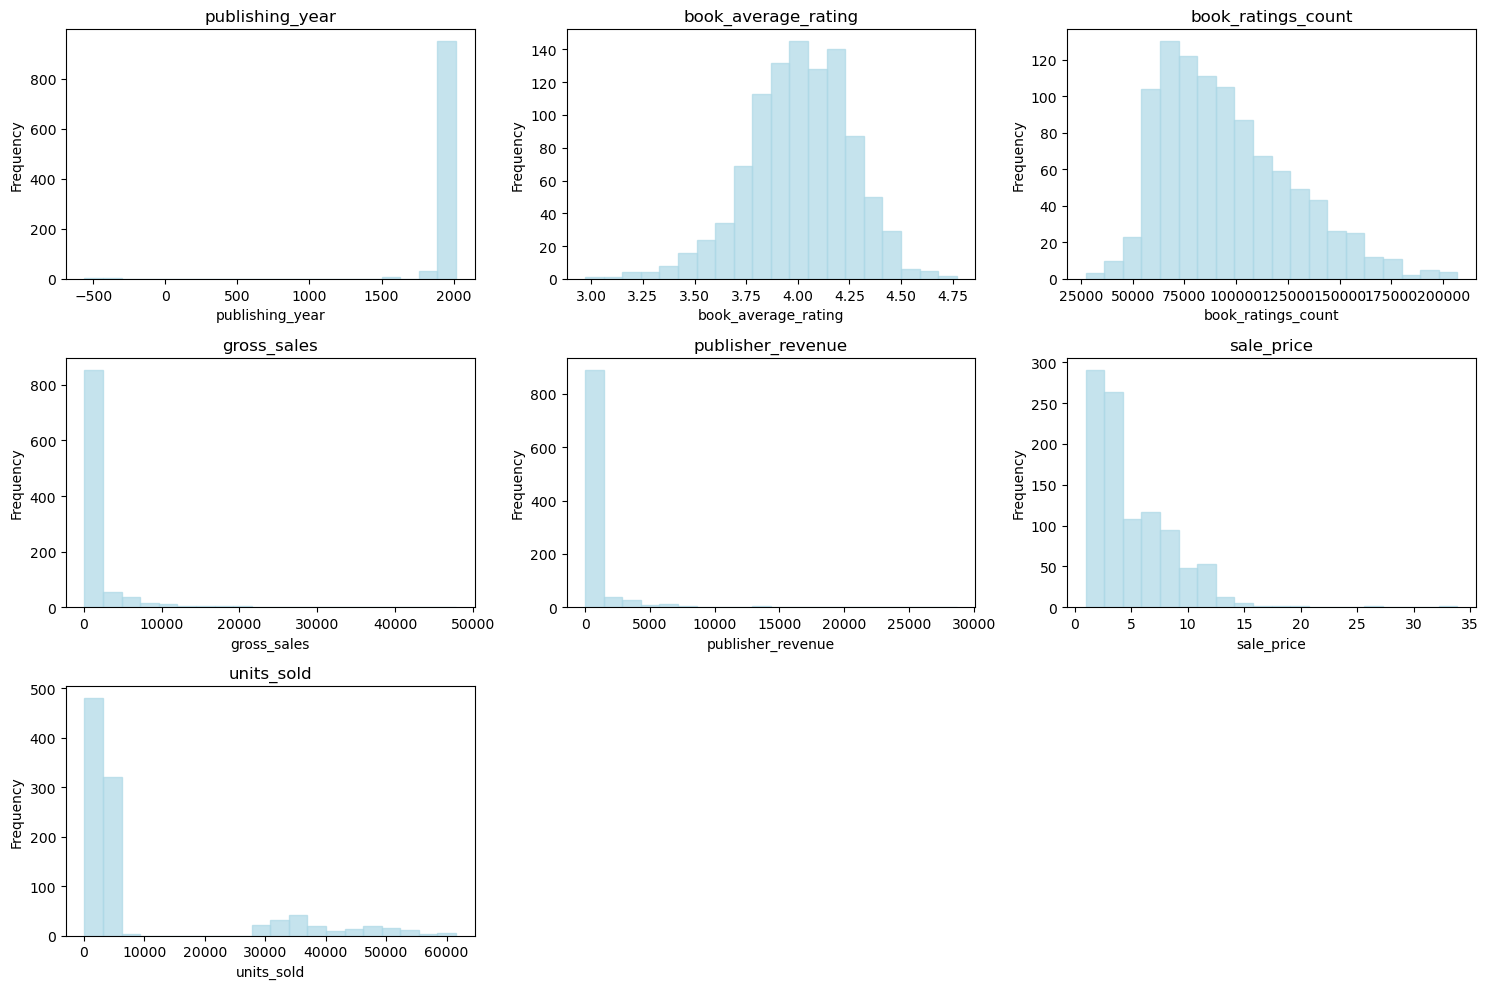

In [61]:
import matplotlib.pyplot as plt
numeric_columns = sales_analysis_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 10))  
for i, column in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) //3,3, i) 
    plt.hist(sales_analysis_df[column], bins=20, color='lightblue', alpha=0.7, edgecolor='lightblue')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\sweth\AppData\Local\Temp\ipykernel_24044\718195168.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = sales_analysis_df.corr()


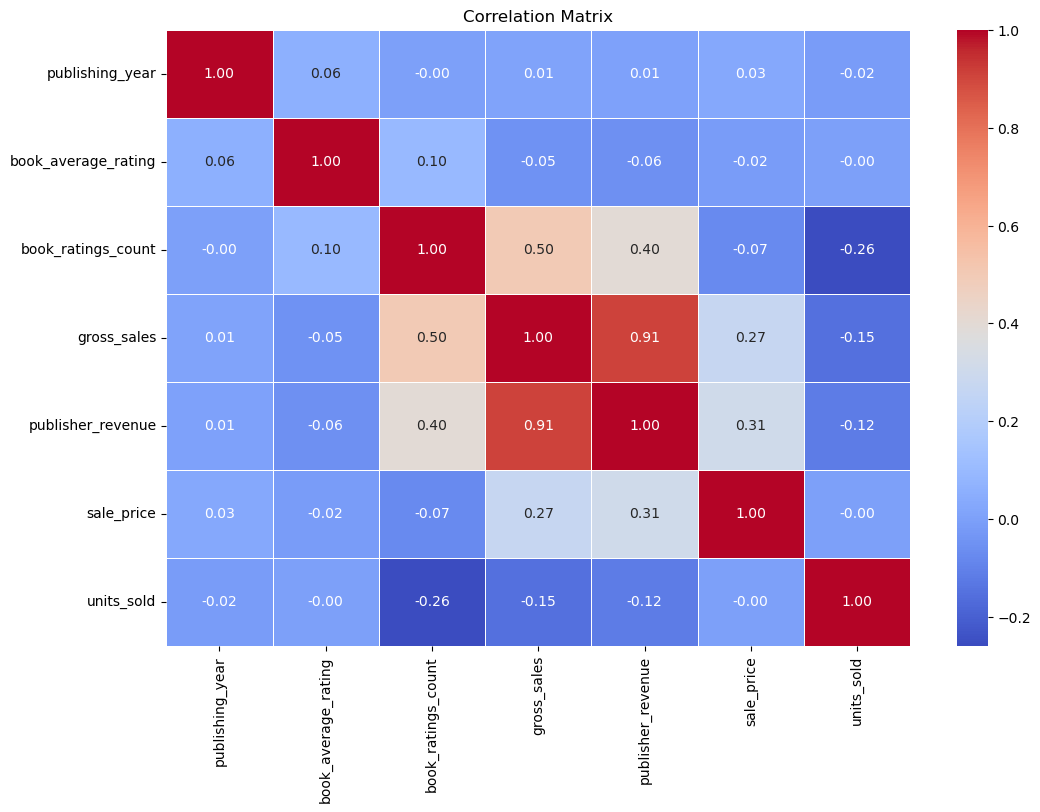

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = sales_analysis_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [6]:

publisher_sales = sales_analysis_df.groupby("publisher_name")["gross_sales"].sum().reset_index()
publisher_sales_sorted = publisher_sales.sort_values(by="gross_sales", ascending=False)
print(publisher_sales_sorted.head(10))  # Display top 10 publishers by total gross sales


                         publisher_name  gross_sales
0        Amazon Digital Services,  Inc.    705879.49
6               Penguin Group (USA) LLC    328669.97
7                      Random House LLC    284140.86
1                   Hachette Book Group    214407.33
3              HarperCollins Publishers    208833.20
8  Simon and Schuster Digital Sales Inc     77978.72
5                             Macmillan     53127.95
4              HarperCollins Publishing      4718.01
2    HarperCollins Christian Publishing      3559.45


In [8]:
#Creating a dummy variable 

sales_analysis_df['Is_Amazon'] = sales_analysis_df['publisher_name'].apply(lambda x: 1 if 'Amazon' in x else 0)
sales_analysis_df[['publisher_name', 'Is_Amazon']].head()


,publisher_name,Is_Amazon
0,HarperCollins Publishers,0
1,HarperCollins Publishers,0
2,"Amazon Digital Services, Inc.",1
3,Hachette Book Group,0
4,Penguin Group (USA) LLC,0


In [9]:
sales_analysis_df.describe()

,publishing_year,book_average_rating,book_ratings_count,gross_sales,publisher_revenue,sale_price,units_sold,Is_Amazon
count,998.000000,998.000000,998.000000,998.00000,998.000000,998.000000,998.000000,998.000000
mean,1971.183367,4.003717,95424.271543,1885.08515,848.897952,4.839649,9802.312625,0.567134
std,190.010129,0.247281,31638.363988,4023.26877,2303.504061,3.585046,15503.088302,0.495721
min,-560.000000,2.970000,27308.000000,104.94000,0.000000,0.990000,106.000000,0.000000
25%,1985.000000,3.850000,70946.500000,370.88250,0.000000,1.990000,555.000000,0.000000
50%,2003.000000,4.010000,89751.500000,806.25000,260.619000,3.990000,3915.000000,1.000000
75%,2010.000000,4.170000,115274.000000,1492.96500,721.180500,6.990000,5420.250000,1.000000
max,2016.000000,4.770000,206792.000000,47795.00000,28677.000000,33.860000,61560.000000,1.000000


In [10]:
#Creating more dummy variables

sales_analysis_df['price_per_rating'] = sales_analysis_df['sale_price'] / (sales_analysis_df['book_average_rating'] + 1e-6)
current_year = 2025
sales_analysis_df['book_age'] = current_year - sales_analysis_df['publishing_year']
sales_analysis_df['rating_density'] = sales_analysis_df['book_ratings_count'] / (sales_analysis_df['book_age'] + 1e-6)


# Predictions using Linear Regression, Logistic Regression and Random Forest 
 In the concluding stage of our project, we applied machine learning algorithms, specifically linear regression and random forest, to derive predictive models for book sales. These algorithms were chosen for their ability to analyze patterns and relationships within the dataset, enabling us to make informed predictions about the number of units sold based on various features such as genre, author rating, and book average rating.

Linear Regression R2 Score: 0.3304501127465276
Linear Regression RMSE: 2069.6468830545477


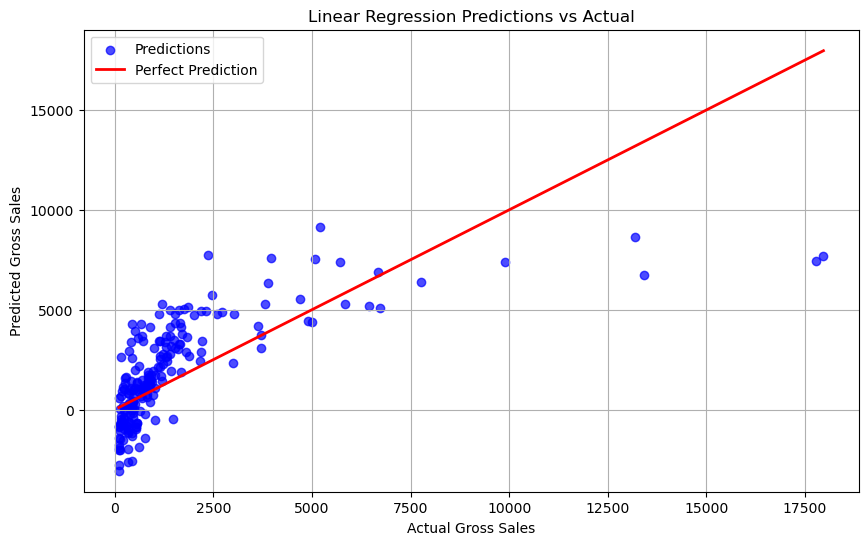

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
features = ["sale_price", "book_average_rating", "book_ratings_count", "book_age", "rating_density", "Is_Amazon"]
target = "gross_sales"
X = sales_analysis_df[features]
y = sales_analysis_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)

print(f"Linear Regression R2 Score: {r2_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")

# Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Gross Sales")
plt.ylabel("Predicted Gross Sales")
plt.title("Linear Regression Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()



Random Forest Regressor R2 Score: 0.645293665822886
Random Forest Regressor RMSE: 1506.3963513908866


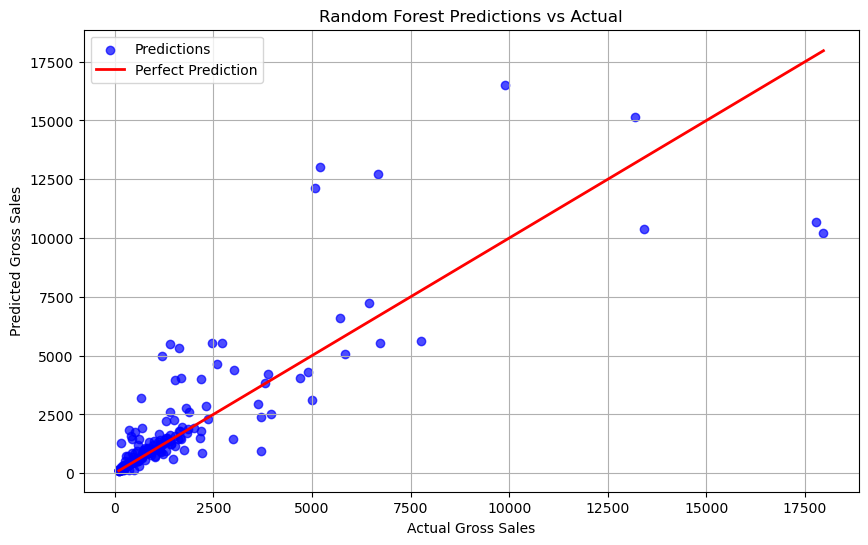

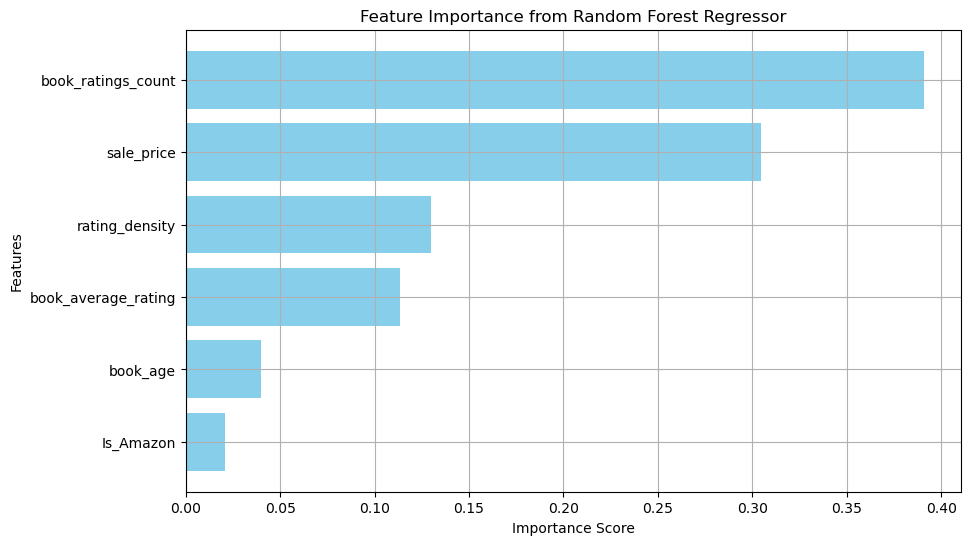

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

features = ["sale_price", "book_average_rating", "book_ratings_count", "book_age", "rating_density", "Is_Amazon"]
target = "gross_sales"

X = sales_analysis_df[features]
y = sales_analysis_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Random Forest Regressor R2 Score: {r2}")
print(f"Random Forest Regressor RMSE: {rmse}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel("Actual Gross Sales")
plt.ylabel("Predicted Gross Sales")
plt.title("Random Forest Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()

feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, feature_importances[sorted_indices], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest Regressor")
plt.gca().invert_yaxis()  
plt.grid(True)
plt.show()

Classification Report: 
              precision    recall  f1-score   support

           0       0.60      0.25      0.35       101
           1       0.52      0.83      0.64        99

    accuracy                           0.54       200
   macro avg       0.56      0.54      0.49       200
weighted avg       0.56      0.54      0.49       200



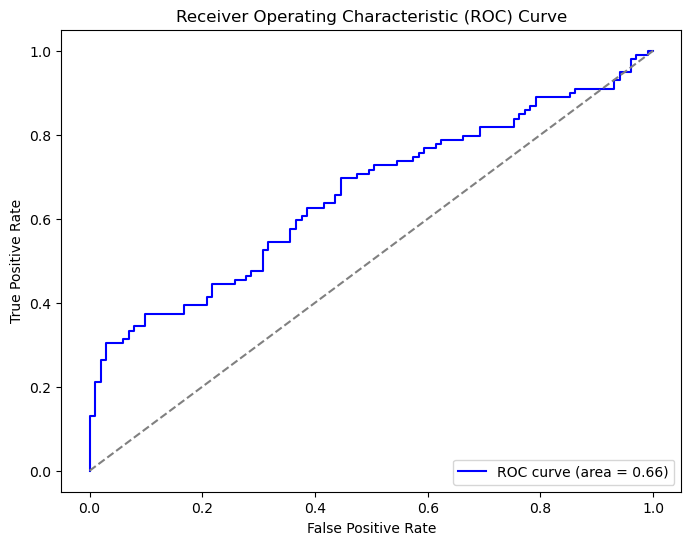

Logistic Regression AUC Score: 0.6560656065606558


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score


median_sales = sales_analysis_df[target].median()
y_binary = (y > median_sales).astype(int)


X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_binary, test_size=0.2, random_state=42)
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train_bin)
y_pred_logreg = logreg_model.predict(X_test)
y_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]  
print(f"Classification Report: \n{classification_report(y_test_bin, y_pred_logreg)}")
fpr, tpr, _ = roc_curve(y_test_bin, y_prob_logreg)
roc_auc = roc_auc_score(y_test_bin, y_prob_logreg)

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"Logistic Regression AUC Score: {roc_auc}")


# Conclusion
In this analysis, multiple machine learning models were evaluated for predicting book sales, specifically gross sales, based on the selected features. Among the models:

Random Forest Regressor demonstrated strong performance with:

R² Score: 0.645, indicating that the model explains 64.5% of the variance in gross sales.
RMSE: 1506.40, reflecting a reasonably low average error in predictions.
This result highlights the model's ability to capture complex, non-linear relationships in the dataset, making it the most effective choice for forecasting gross sales.
Linear Regression performed significantly worse with:

R² Score: 0.33, showing limited ability to explain the variance in gross sales.
RMSE: 2069.65, indicating higher prediction errors compared to the Random Forest model.
Linear regression's relatively poor performance suggests that the relationships between features and sales are non-linear and cannot be captured adequately by a simple linear model.
Logistic Regression was evaluated for binary classification (above or below median sales) and yielded:

AUC Score: 0.656, indicating moderate discriminatory power.
Accuracy: 54%, barely outperforming random guessing.
While logistic regression provides insights into broad classifications, it lacks the granularity needed for effective gross sales prediction.
